# Loading matlab data (and doing some preprocessing)

In [1]:
import os
import numpy as np
import scipy.io as sio
import h5py
import matplotlib.pyplot as plt 

# signal processing 
import scipy.signal as ssignal

# fancy plot stuff 
import sciplotlib.style as splstyle
import sciplotlib.polish as splpolish 

ModuleNotFoundError: No module named 'h5py'

## Load matlab file

In [60]:
mat_filepath = '/home/timsit/mecp2/data/PAT200219_2C_DIV17.mat'

In [61]:
f = h5py.File(mat_filepath)
data_dict = {}
for k, v in f.items():
    data_dict[k] = np.array(v)

/home/timsit/.conda/envs/msi/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


## Have a look at the raw data

In [66]:
raw_traces = data_dict['dat']
fs = data_dict['fs'][0][0]
num_channels = np.shape(raw_traces)[0]
num_samples = np.shape(raw_traces)[1]
time = np.arange(num_samples) / fs

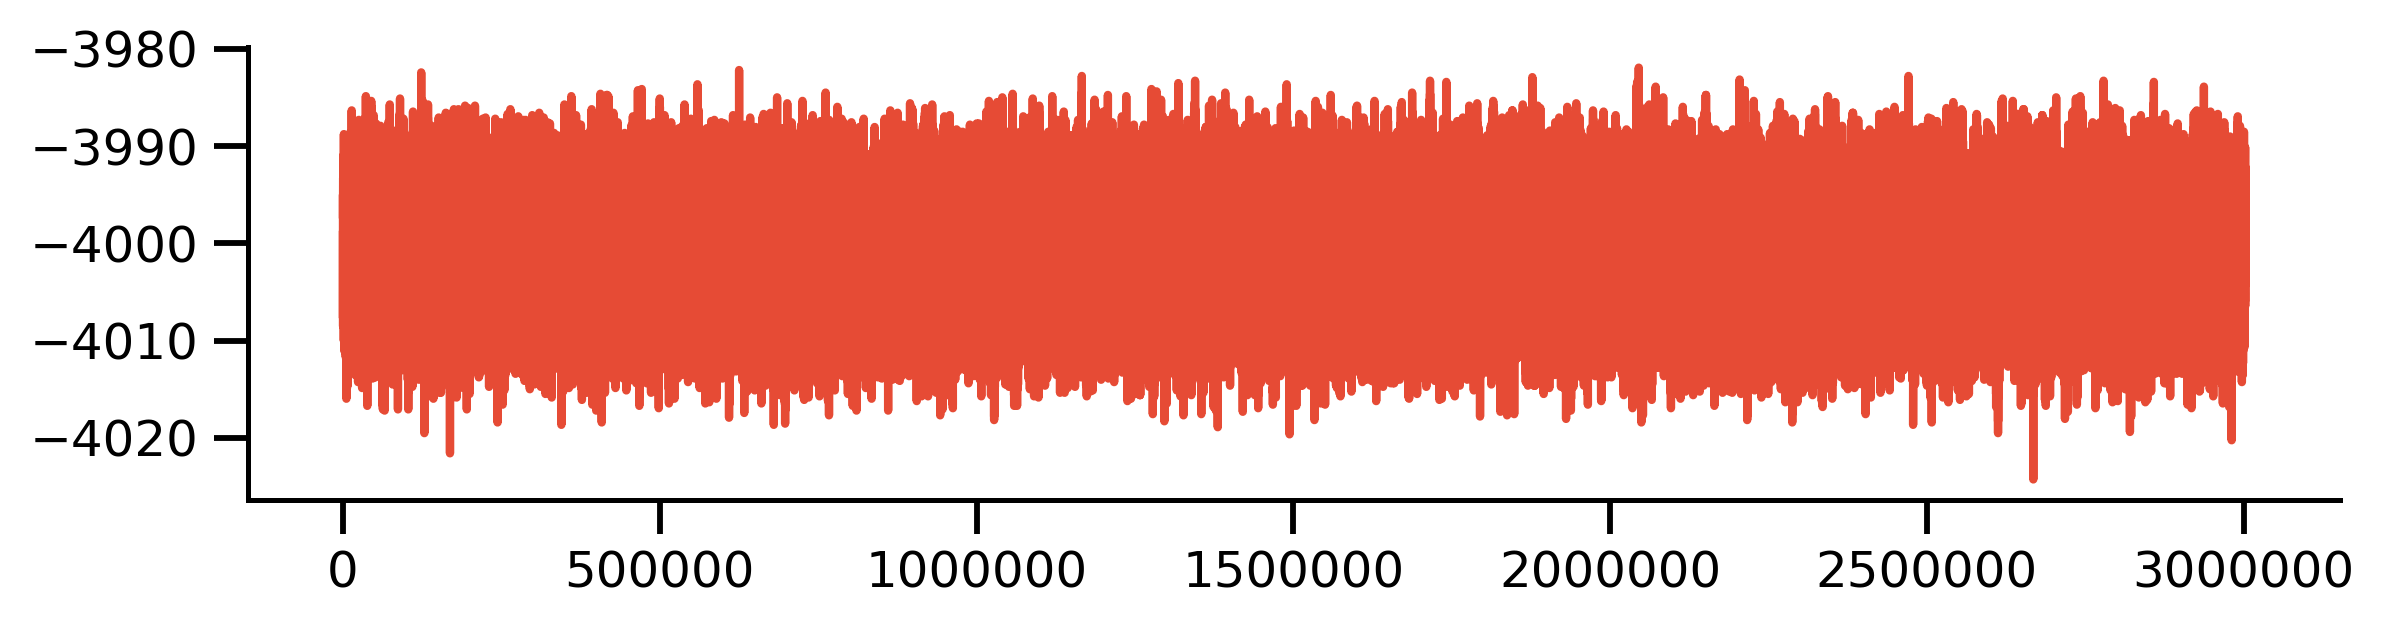

In [63]:
channel_num = 0
with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 2)
    ax.plot(raw_traces[channel_num, :])

60

## First attempt to move some of the spike detection code to python

In [80]:
25000 / 2500

10.0

In [95]:
def detect_spikes(spike_data, method='manuel', fs=25000, multiplier=5):
    """
    Detection of spikes from raw MEA data.
    
    Parameters 
    -----------
    method : (str)
        method used to perform spike detection
    fs : (int)
        sampling rate
    """
    
    if method == 'manuel':
        low_pass = 600
        high_pass = 8000 
        filter_order = 3
        
        wn = np.array([low_pass, high_pass]) / (fs / 2)
        
        b, a = ssignal.butter(filter_order, Wn=wn, btype='bandpass')
        
        filtered_data = ssignal.filtfilt(b, a, spike_data)
        
        # finding threshold and spikes
        m = np.mean(filtered_data); 
        s = np.std(filtered_data); 
        threshold = m - multiplier * s; 
        neg_threshold = m - 8 * s; # maximum threshold, a simple artefact removal method 
        spike_train = (filtered_data < threshold).astype(int)
        
        
        # Impose refractory period 
        ref_period = 2.0 * 10 ** -3 * fs
        
        # for spike_idx in np.arange(len(spike_train)):
        #    if spike_train[]
        
        
    elif method == 'cwt':
        
        # Filter
        lowpass = 600; 
        highpass = 8000; 
        
        wn = np.array([lowpass, highpass]) / (fs / 2); 
        
        filterOrder = 3;
        [b, a] =ssignal.butter(filterOrder, wn, btype='bandpass'); 
        filtered_data = ssignal.filtfilt(b, a, spike_data); 
    
    
    else:
        print('No valid spike detection method specified, returning None')
        spike_train = None
        

    return spike_train


def down_sample_spike_matrix(spike_matrix, down_sample_factor=2500):
    
    
    original_num_samp = np.shape(spike_matrix)[1]
    new_num_samp = original_num_samp / down_sample_factor 
    reshaped_spike_matrix = np.reshape(spike_matrix, (int(num_channels), int(new_num_samp), -1))
    down_sampled_matrix = np.sum(reshaped_spike_matrix, axis=-1)
    
    return down_sampled_matrix

In [70]:
spike_train = detect_spikes(spike_data=raw_traces)
np.sum(spike_train)

20147

In [72]:
spike_train_list = list()
for channel in np.arange(num_channels):
    spike_train = detect_spikes(spike_data=raw_traces[channel, :])
    spike_train_list.append(spike_train)



In [75]:
spike_matrix = np.stack(spike_train_list)

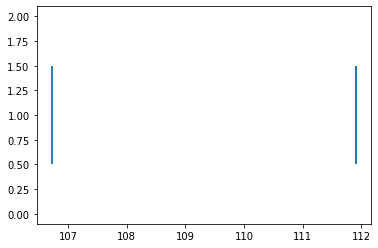

In [55]:
fig, ax = plt.subplots()
ax.eventplot(time[np.where(spike_train)])

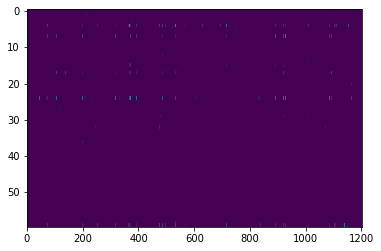

In [96]:
fig, ax = plt.subplots()
down_sample_matrix = down_sample_spike_matrix(spike_matrix)
ax.imshow(down_sample_matrix, aspect='auto')

In [93]:
down_sample_factor = 2500


In [91]:
np.shape(reshaped_spike_matrix)

(60, 1201, 2500)

In [94]:
np.shape(down_sampled_matrix)

(60, 1201)

In [88]:
new_num_samp

1201.0